# Pymaceuticals Inc.
---

### Analysis

- For mice in this study treated with the drug, "Capomulin", there is a negative correlation between timepoints measured and Tumor Volume suggesting this drug is effective in reducing the tumor volume. This analysis, however was only done for a single mouse from the general population of mice treated with this drug, therefore we cannot conclude the same result would apply for all mice given this treatment

- There is also a strong positive correlation between the average weight and average tumor volume for mice treated with Capomulin. From this we can conclude that the heavier the mouse, the more likely it is to have a larger tumor size. This is important to note as it highlights the dangers of being overweight when treating SCC.
 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merged_df= pd.merge(mouse_metadata, study_results, how= 'outer', on= "Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [39]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()

249

In [40]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicates['Mouse ID'].unique()


array(['g989'], dtype=object)

In [41]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= merged_df.drop(merged_df[merged_df['Mouse ID'] == 'g989'].index)


clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [43]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

grouped = clean_df.groupby('Drug Regimen')

mean = grouped['Tumor Volume (mm3)'].mean()
median = grouped['Tumor Volume (mm3)'].median()
variance = grouped['Tumor Volume (mm3)'].var()
std = grouped['Tumor Volume (mm3)'].std()
sem = grouped['Tumor Volume (mm3)'].sem()

grouped_df= pd.DataFrame({
    "Mean":mean, 
    "Median": median,
    "Variance": variance,
    "Std": std,
    "SEM": sem
})

grouped_df


,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [45]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_vs_drug= clean_df.groupby("Drug Regimen")["Timepoint"].sum()

timepoints_vs_drug.head()


Drug Regimen
Capomulin    4960
Ceftamin     3515
Infubinol    3235
Ketapril     3705
Naftisol     3650
Name: Timepoint, dtype: int64

<AxesSubplot:xlabel='Drug Regimen'>

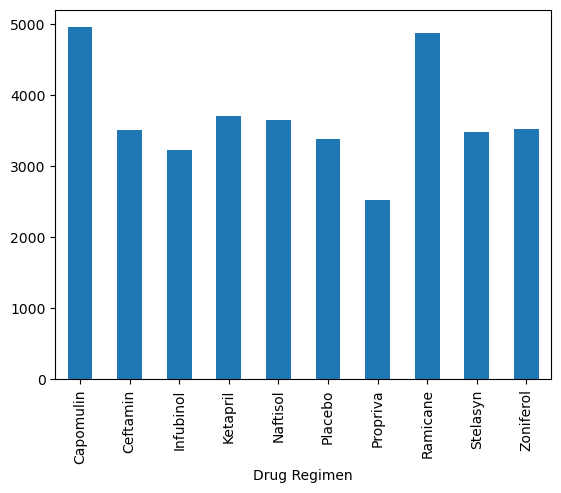

In [46]:
timepoints_vs_drug.plot(kind='bar')




<AxesSubplot:ylabel='Sex'>

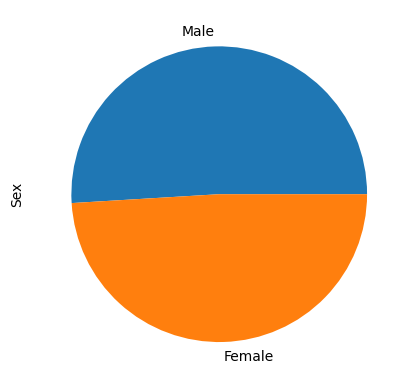

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts= clean_df["Sex"].value_counts()
gender_counts.plot.pie()


Text(0.5, 1.0, 'Males vs Females')

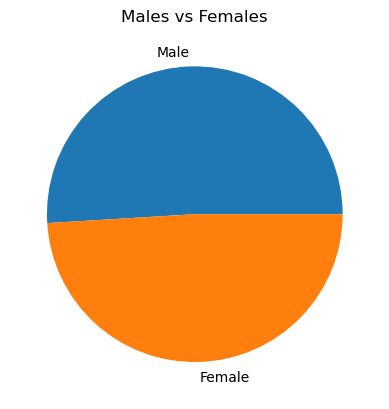

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_counts, labels= gender_counts.index)
plt.title("Males vs Females")


## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
maxTimePoint_df= pd.merge(clean_df, last_timepoint, on= 'Mouse ID')
maxTimePoint_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [50]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamine"]    


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drug_list:
    select_treatment_df= maxTimePoint_df.loc[maxTimePoint_df["Drug Regimen"]== drug]
    tumor_values = select_treatment_df["Tumor Volume (mm3)"]
    tumor_vol.append(tumor_values)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_values.loc[(select_treatment_df["Tumor Volume (mm3)"] < lower_bound) | (select_treatment_df["Tumor Volume (mm3)"] > upper_bound)]
    print(drug + "'s potential outliers: " + str(outliers))     

Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamine's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [51]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

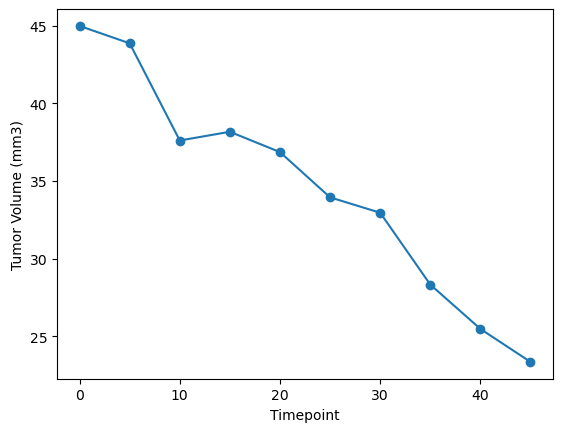

In [52]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
capomulin.head()

mouse_id= 's185'
df_mouse= capomulin[capomulin["Mouse ID"]== mouse_id]

plt.plot(df_mouse['Timepoint'], df_mouse['Tumor Volume (mm3)'], marker='o')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


In [53]:
capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


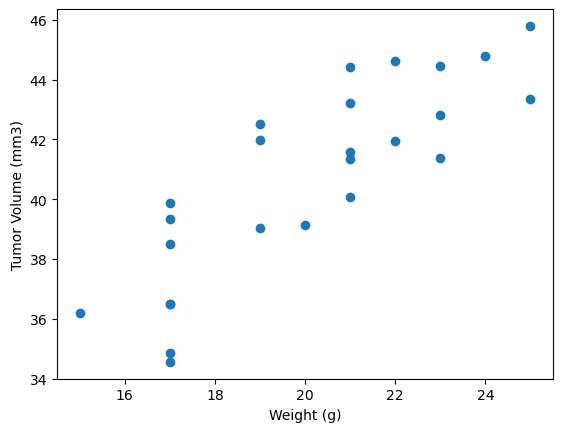

In [54]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Cap_grouped= capomulin.groupby("Mouse ID")[['Weight (g)', 'Tumor Volume (mm3)']].mean()

plt.scatter(Cap_grouped['Weight (g)'], Cap_grouped['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

Correlation coefficient: 0.841936342469472
Linear regression model: y = 0.95x + 21.55


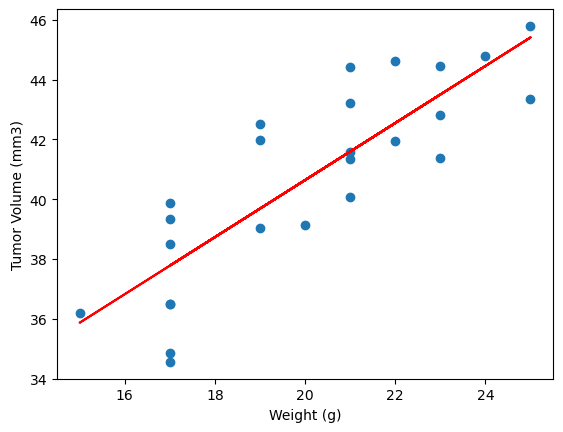

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# calculate the correlation coefficient
from scipy.stats import pearsonr, linregress


corr_coef, p_value = pearsonr(Cap_grouped['Weight (g)'], Cap_grouped['Tumor Volume (mm3)'])
print('Correlation coefficient:', corr_coef)

# calculate the linear regression model
slope, intercept, r_value, p_value, std_err = linregress(Cap_grouped['Weight (g)'], Cap_grouped['Tumor Volume (mm3)'])

print('Linear regression model: y = {:.2f}x + {:.2f}'.format(slope, intercept))
plt.scatter(Cap_grouped['Weight (g)'], Cap_grouped['Tumor Volume (mm3)'])
plt.plot(Cap_grouped['Weight (g)'], slope * Cap_grouped['Weight (g)'] + intercept, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
# show the plot
plt.show()